#Задача 1

#Прв дел

#Симнете ги податочните множества локално
изврши ги следните два блока


In [ ]:
!gdown --id 1-38wf-K-FU9AyyyLF8Ke8e8zYoYYc8vV

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-38wf-K-FU9AyyyLF8Ke8e8zYoYYc8vV
To: /content/time_mk_bitcoin_3.csv
100% 16.0k/16.0k [00:00<00:00, 67.1MB/s]


In [ ]:
!gdown --id 1j2Qt86iWn9W-yw17VEYMUzxBj27hHSi0

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1j2Qt86iWn9W-yw17VEYMUzxBj27hHSi0
To: /content/BTC-USD-3.csv
100% 2.04k/2.04k [00:00<00:00, 12.0MB/s]


#Спој ги двете податочни множества

In [ ]:
import pandas as pd


In [ ]:
df1 = pd.read_csv('/content/BTC-USD-3.csv')
df2 = pd.read_csv('/content/time_mk_bitcoin_3.csv')
df1.head()
df2.head()

,Date,Source,Title
0,01-03-22,Локално,Биткоинот целосно се опорави од шокот предизви...
1,01-03-22,Н.Македонија,Украинската криза го промовираше биткоинот во ...
2,01-03-22,Вечер Прес,Најголемата крипто берза не сака да ја блокира...
3,01-03-22,Слободен Печат,ВИДЕО | Гошевски: Прва Светска крипто-војна – ...
4,01-03-22,Банкарство.мк,Најголемата крипто берза не сака да ја блокира...


In [ ]:
df = pd.merge(df1, df2, on='Date')

In [ ]:
df.head()

,Date,Open,Close,Source,Title
0,09-02-22,44096.70313,44338.79688,IT.mk,Во полициска акција запленети криптовалути со ...
1,09-02-22,44096.70313,44338.79688,Локално,Аналитичари на JPMorgan ја пресметале „фер цен...
2,09-02-22,44096.70313,44338.79688,Локално,Аналитичар: Дали сега е време да се купи Биткоин?
3,09-02-22,44096.70313,44338.79688,MakPress,Американското Министерство за правда заплени н...
4,09-02-22,44096.70313,44338.79688,Таратур,Уапсен брачен пар кој во 2016 година украле би...


#Направи визуелизација на таргет колоната

<Axes: >

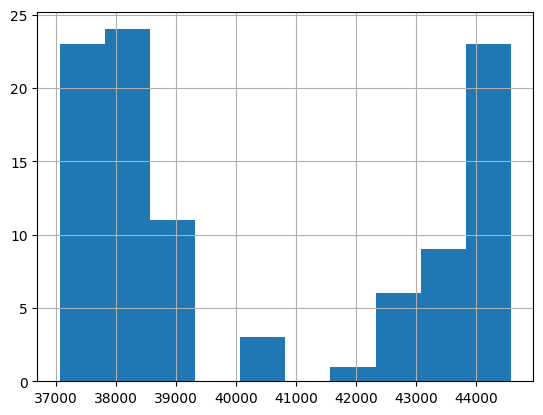

In [ ]:
df.Open.hist()

<Axes: >

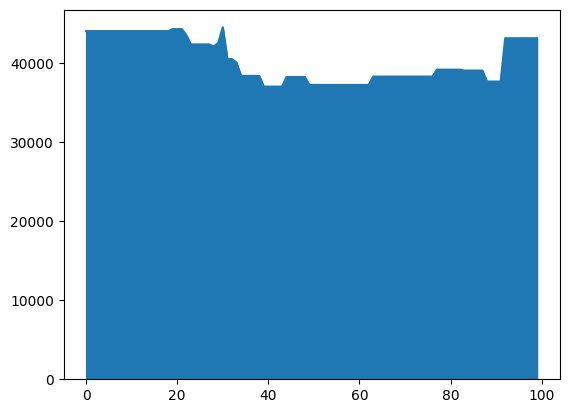

In [ ]:
df.Open.plot.area()


#Изврши статистика за колоните

In [ ]:
df.describe()

,Open,Close
count,100.000000,100.000000
mean,40316.686056,40761.149104
std,2776.980417,2806.433900
min,37068.769530,37075.281250
25%,38285.281250,38332.609380
50%,39098.699220,39214.218750
75%,43194.503910,44338.796880
max,44578.277340,44575.203130


#Претпроцесирај ги текстуалните податоци

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder2 = OneHotEncoder()
df_copy=df.copy()
df

,Date,Open,Close,Source,Title
0,09-02-22,44096.70313,44338.79688,IT.mk,Во полициска акција запленети криптовалути со ...
1,09-02-22,44096.70313,44338.79688,Локално,Аналитичари на JPMorgan ја пресметале „фер цен...
2,09-02-22,44096.70313,44338.79688,Локално,Аналитичар: Дали сега е време да се купи Биткоин?
3,09-02-22,44096.70313,44338.79688,MakPress,Американското Министерство за правда заплени н...
4,09-02-22,44096.70313,44338.79688,Таратур,Уапсен брачен пар кој во 2016 година украле би...
...,...,...,...,...,...
95,01-03-22,43194.50391,44354.63672,Слободен Печат,ВИДЕО | Гошевски: Прва Светска крипто-војна – ...
96,01-03-22,43194.50391,44354.63672,Банкарство.мк,Најголемата крипто берза не сака да ја блокира...
97,01-03-22,43194.50391,44354.63672,Курир,Најголемата крипто-берза не сака да ја блокира...
98,01-03-22,43194.50391,44354.63672,Слободен Печат,Вредноста на дигиталните валути расте поради с...


In [ ]:
df_copy['Title']=encoder2.fit_transform(df_copy['Title'].to_numpy().reshape(-1, 1)).toarray()


In [ ]:
df_copy['Source']=encoder2.fit_transform(df_copy['Source'].to_numpy().reshape(-1, 1)).toarray()

In [ ]:
df_copy['Date']=encoder2.fit_transform(df_copy['Date'].to_numpy().reshape(-1, 1)).toarray()

In [ ]:
df_copy

,Date,Open,Close,Source,Title
0,0.0,44096.70313,44338.79688,0.0,0.0
1,0.0,44096.70313,44338.79688,0.0,0.0
2,0.0,44096.70313,44338.79688,0.0,0.0
3,0.0,44096.70313,44338.79688,0.0,0.0
4,0.0,44096.70313,44338.79688,0.0,0.0
...,...,...,...,...,...
95,1.0,43194.50391,44354.63672,0.0,0.0
96,1.0,43194.50391,44354.63672,0.0,0.0
97,1.0,43194.50391,44354.63672,0.0,0.0
98,1.0,43194.50391,44354.63672,0.0,0.0


In [ ]:
df.isna().sum()


Date      0
Open      0
Close     0
Source    0
Title     0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
stand = MinMaxScaler()


In [ ]:
df_copy2 = df_copy.copy()
df_copy2


,Date,Open,Close,Source,Title
0,0.0,44096.70313,44338.79688,0.0,1.0
1,0.0,44096.70313,44338.79688,0.0,1.0
2,0.0,44096.70313,44338.79688,0.0,1.0
3,0.0,44096.70313,44338.79688,0.0,1.0
4,0.0,44096.70313,44338.79688,0.0,1.0
...,...,...,...,...,...
95,1.0,43194.50391,44354.63672,0.0,0.0
96,1.0,43194.50391,44354.63672,0.0,0.0
97,1.0,43194.50391,44354.63672,0.0,0.0
98,1.0,43194.50391,44354.63672,0.0,0.0


In [ ]:
df_copy2['Source'] = stand.fit_transform(df_copy2['Source'].to_numpy().reshape(-1, 1))

In [ ]:
df_copy2['Source']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: Source, Length: 100, dtype: float64

In [ ]:
from sklearn.impute import KNNImputer

KNNImputer = KNNImputer(n_neighbors=3)
df_copy2['Source'] = KNNImputer.fit_transform(df_copy2['Source'].to_numpy().reshape(-1,1))

In [ ]:
df_copy2

,Date,Open,Close,Source,Title
0,0.0,44096.70313,44338.79688,0.0,1.0
1,0.0,44096.70313,44338.79688,0.0,1.0
2,0.0,44096.70313,44338.79688,0.0,1.0
3,0.0,44096.70313,44338.79688,0.0,1.0
4,0.0,44096.70313,44338.79688,0.0,1.0
...,...,...,...,...,...
95,1.0,43194.50391,44354.63672,0.0,0.0
96,1.0,43194.50391,44354.63672,0.0,0.0
97,1.0,43194.50391,44354.63672,0.0,0.0
98,1.0,43194.50391,44354.63672,0.0,0.0


#Подели го податочното множество за тренирање и тестирање

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
Y=df_copy2['Open']
X= df_copy2[['Close','Source','Title']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Изгради модел и тренирај го

Linearna regresija

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

In [ ]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.8479594781003952


In [ ]:
model.coef_

In [ ]:
print('Intercept:', model.intercept_)

Intercept: 9461.418472929876


In [ ]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([41306.57496427, 38246.3114998 , 37778.61757452, 41896.27357991,
       41896.27357991, 38908.33351754, 38826.42995666, 42175.52653265,
       42473.45287348, 42934.02768219, 39521.65691425, 42175.52653265,
       38826.42995666, 44080.84155089, 38246.3114998 , 44080.84155089,
       38211.33190775, 38211.33190775, 38826.42995666, 44080.84155089])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(Y_test, Y_pred_lin)

0.6341111840637501